In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_row', 500)

In [3]:
raw_data = sns.load_dataset('titanic')
print(raw_data.head(50))

    survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0          0       3    male  22.0      1      0    7.2500        S   Third   
1          1       1  female  38.0      1      0   71.2833        C   First   
2          1       3  female  26.0      0      0    7.9250        S   Third   
3          1       1  female  35.0      1      0   53.1000        S   First   
4          0       3    male  35.0      0      0    8.0500        S   Third   
5          0       3    male   NaN      0      0    8.4583        Q   Third   
6          0       1    male  54.0      0      0   51.8625        S   First   
7          0       3    male   2.0      3      1   21.0750        S   Third   
8          1       3  female  27.0      0      2   11.1333        S   Third   
9          1       2  female  14.0      1      0   30.0708        C  Second   
10         1       3  female   4.0      1      1   16.7000        S   Third   
11         1       1  female  58.0      0      0   2

In [4]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


In [5]:
raw_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
clean_data = raw_data.dropna(axis=1, thresh=500)
print(clean_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [7]:
mean_age = clean_data['age'].mean()
print(mean_age)

29.69911764705882


In [8]:
print(clean_data.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  wo

In [9]:
df = clean_data['age'].fillna(mean_age, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [10]:
print(clean_data.head(10))

   survived  pclass     sex        age  sibsp  parch     fare embarked  \
0         0       3    male  22.000000      1      0   7.2500        S   
1         1       1  female  38.000000      1      0  71.2833        C   
2         1       3  female  26.000000      0      0   7.9250        S   
3         1       1  female  35.000000      1      0  53.1000        S   
4         0       3    male  35.000000      0      0   8.0500        S   
5         0       3    male  29.699118      0      0   8.4583        Q   
6         0       1    male  54.000000      0      0  51.8625        S   
7         0       3    male   2.000000      3      1  21.0750        S   
8         1       3  female  27.000000      0      2  11.1333        S   
9         1       2  female  14.000000      1      0  30.0708        C   

    class    who  adult_male  embark_town alive  alone  
0   Third    man        True  Southampton    no  False  
1   First  woman       False    Cherbourg   yes  False  
2   Third  wom

In [11]:
clean_data.drop(['embark_town', 'alive'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB
None


In [13]:
print(clean_data['embarked'][825:830])

825      Q
826      S
827      C
828      Q
829    NaN
Name: embarked, dtype: object


In [14]:
clean_data['embarked'].fillna(
    method='ffill', inplace=True)
print(clean_data['embarked'][825:830])

825    Q
826    S
827    C
828    Q
829    Q
Name: embarked, dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [15]:
print(clean_data.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


In [16]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB
None


In [17]:
clean_data['sex'].replace({'male':0, 'female':1}, inplace=True)
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(5), object(2)
memory usage: 65.5+ KB
None


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [18]:
print(clean_data['sex'].unique())

[0 1]


In [19]:
print(clean_data['embarked'].unique())

['S' 'C' 'Q']


In [20]:
from sklearn import preprocessing

In [21]:
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

In [22]:
print(clean_data['embarked'].value_counts())

S    644
C    169
Q     78
Name: embarked, dtype: int64


In [23]:
clean_data['embarked'] = label_encoder.fit_transform(
    clean_data['embarked'])
print(clean_data['embarked'].unique())

[2 0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
print(clean_data['embarked'].value_counts())

2    644
0    169
1     78
Name: embarked, dtype: int64


In [25]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    int64   
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(6), object(1)
memory usage: 65.5+ KB
None


In [26]:
clean_data['class'] = label_encoder.fit_transform(
    clean_data['class'])
print(clean_data['class'].unique())

[2 0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(7), object(1)
memory usage: 71.5+ KB
None


In [28]:
clean_data['who'] = label_encoder.fit_transform(
    clean_data['who'])
print(clean_data['who'].unique())

[1 2 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 71.5 KB
None


In [30]:
clean_data['adult_male'] = clean_data['adult_male'].astype(
    'int64')
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    int64  
 11  alone       891 non-null    bool   
dtypes: bool(1), float64(2), int64(9)
memory usage: 77.6 KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
print(clean_data['adult_male'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int64


In [32]:
clean_data['alone'] = clean_data['alone'].astype(
    'int64')
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    int64  
 11  alone       891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
target = pd.DataFrame(clean_data.iloc[:, 0], columns=['survived'])
training_data = clean_data.drop('survived', axis=1)
print(training_data.head())
print(target.head())

   pclass  sex   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0       3    0  22.0      1      0   7.2500         2      2    1           1   
1       1    1  38.0      1      0  71.2833         0      0    2           0   
2       3    1  26.0      0      0   7.9250         2      2    2           0   
3       1    1  35.0      1      0  53.1000         2      0    2           0   
4       3    0  35.0      0      0   8.0500         2      2    1           1   

   alone  
0      0  
1      0  
2      1  
3      0  
4      1  
   survived
0         0
1         1
2         1
3         1
4         0


In [34]:
value_data = training_data[['age', 'fare']]
print(value_data.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(value_data)
value_data = pd.DataFrame(scaled_data, columns= value_data.columns)
print(value_data.head())

        age      fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


In [36]:
print(value_data.describe())

                age          fare
count  8.910000e+02  8.910000e+02
mean   2.562796e-16 -4.373606e-17
std    1.000562e+00  1.000562e+00
min   -2.253155e+00 -6.484217e-01
25%   -5.924806e-01 -4.891482e-01
50%    0.000000e+00 -3.573909e-01
75%    4.079260e-01 -2.424635e-02
max    3.870872e+00  9.667167e+00


In [37]:
training_data.drop(['age', 'fare'], axis=1, inplace=True)
print(training_data.head())

   pclass  sex  sibsp  parch  embarked  class  who  adult_male  alone
0       3    0      1      0         2      2    1           1      0
1       1    1      1      0         0      0    2           0      0
2       3    1      0      0         2      2    2           0      1
3       1    1      1      0         2      0    2           0      0
4       3    0      0      0         2      2    1           1      1


In [38]:
onehot_data = pd.get_dummies(training_data['pclass'])
print(onehot_data.head())

   1  2  3
0  0  0  1
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1


In [39]:
print(training_data.head())

   pclass  sex  sibsp  parch  embarked  class  who  adult_male  alone
0       3    0      1      0         2      2    1           1      0
1       1    1      1      0         0      0    2           0      0
2       3    1      0      0         2      2    2           0      1
3       1    1      1      0         2      0    2           0      0
4       3    0      0      0         2      2    1           1      1


In [40]:
onehot_data = pd.get_dummies(training_data, columns=training_data.columns)
print(onehot_data.head())

   pclass_1  pclass_2  pclass_3  sex_0  sex_1  sibsp_0  sibsp_1  ...  who_0  \
0         0         0         1      1      0        0        1  ...      0   
1         1         0         0      0      1        0        1  ...      0   
2         0         0         1      0      1        1        0  ...      0   
3         1         0         0      0      1        0        1  ...      0   
4         0         0         1      1      0        1        0  ...      0   

   who_1  who_2  adult_male_0  adult_male_1  alone_0  alone_1  
0      1      0             0             1        1        0  
1      0      1             1             0        1        0  
2      0      1             1             0        0        1  
3      0      1             1             0        1        0  
4      1      0             0             1        0        1  

[5 rows x 32 columns]


In [41]:
print(onehot_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pclass_1      891 non-null    uint8
 1   pclass_2      891 non-null    uint8
 2   pclass_3      891 non-null    uint8
 3   sex_0         891 non-null    uint8
 4   sex_1         891 non-null    uint8
 5   sibsp_0       891 non-null    uint8
 6   sibsp_1       891 non-null    uint8
 7   sibsp_2       891 non-null    uint8
 8   sibsp_3       891 non-null    uint8
 9   sibsp_4       891 non-null    uint8
 10  sibsp_5       891 non-null    uint8
 11  sibsp_8       891 non-null    uint8
 12  parch_0       891 non-null    uint8
 13  parch_1       891 non-null    uint8
 14  parch_2       891 non-null    uint8
 15  parch_3       891 non-null    uint8
 16  parch_4       891 non-null    uint8
 17  parch_5       891 non-null    uint8
 18  parch_6       891 non-null    uint8
 19  embarked_0    891 non-null   

In [42]:
training_data = pd.concat([value_data, onehot_data], axis=1)
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           891 non-null    float64
 1   fare          891 non-null    float64
 2   pclass_1      891 non-null    uint8  
 3   pclass_2      891 non-null    uint8  
 4   pclass_3      891 non-null    uint8  
 5   sex_0         891 non-null    uint8  
 6   sex_1         891 non-null    uint8  
 7   sibsp_0       891 non-null    uint8  
 8   sibsp_1       891 non-null    uint8  
 9   sibsp_2       891 non-null    uint8  
 10  sibsp_3       891 non-null    uint8  
 11  sibsp_4       891 non-null    uint8  
 12  sibsp_5       891 non-null    uint8  
 13  sibsp_8       891 non-null    uint8  
 14  parch_0       891 non-null    uint8  
 15  parch_1       891 non-null    uint8  
 16  parch_2       891 non-null    uint8  
 17  parch_3       891 non-null    uint8  
 18  parch_4       891 non-null    

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(training_data, target, test_size=0.20)

In [44]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(712, 34)
(712, 1)
(179, 34)
(179, 1)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [48]:
model = Sequential()
model.add(Dense(512, input_dim=34, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               17920     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [49]:
model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])

fit_hist = model.fit(
    X_train, Y_train, batch_size=50, epochs=50,
    validation_split=0.2, verbose=1)

Epoch 1/50
12/12 [==============================] - 1s 26ms/step - loss: 0.1876 - binary_accuracy: 0.7364 - val_loss: 0.1413 - val_binary_accuracy: 0.7622
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1473 - binary_accuracy: 0.7979 - val_loss: 0.1391 - val_binary_accuracy: 0.7692
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1415 - binary_accuracy: 0.8207 - val_loss: 0.1272 - val_binary_accuracy: 0.8112
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 0.1310 - binary_accuracy: 0.8190 - val_loss: 0.1393 - val_binary_accuracy: 0.8182
Epoch 5/50
12/12 [==============================] - 0s 9ms/step - loss: 0.1294 - binary_accuracy: 0.8243 - val_loss: 0.1314 - val_binary_accuracy: 0.8392
Epoch 6/50
12/12 [==============================] - 0s 9ms/step - loss: 0.1246 - binary_accuracy: 0.8401 - val_loss: 0.1436 - val_binary_accuracy: 0.8042
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1

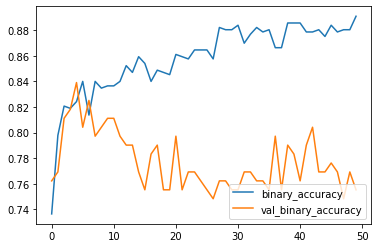

In [50]:
import matplotlib.pyplot as plt

plt.plot(fit_hist.history['binary_accuracy'], label='binary_accuracy')
plt.plot(fit_hist.history['val_binary_accuracy'], label='val_binary_accuracy')
plt.legend(loc='lower right')
plt.show()

In [51]:
score = model.evaluate(X_test, Y_test, verbose=1)  #verbose : 0을 주면 진행상황을 보여주지 않음, defalt : 1
print('Keras DNN model loss:', score[0])
print('Keras DNN model accuracy:', score[1])

6/6 [==============================] - 0s 3ms/step - loss: 0.1805 - binary_accuracy: 0.7709
Keras DNN model loss: 0.1805429458618164
Keras DNN model accuracy: 0.7709497213363647
